# Interaction between two classes (0 and 1) in the COIL 20 dataset

For this, we will use the induced block function.

In [28]:
from PIL import Image
import numpy as np
from numpy.random import default_rng
import os
from skimage.metrics import structural_similarity as ssim

import IBloFunMatch_inter as ibfm

import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance

In [29]:
def draw_repr_cycle(repr_cycle, figsize, data):
    fig, ax = plt.subplots(figsize=figsize)
    G = nx.Graph()
    for v in np.unique(repr_cycle):
        G.add_node(v)
    weighted_edges = []
    for edge in np.array(repr_cycle).reshape((-1,2)).tolist():
        weighted_edges.append((edge[0], edge[1], distance.euclidean(data[edge[0]], data[edge[1]])))
    # G.add_edges_from(weighted_edges)
    G.add_weighted_edges_from(weighted_edges)
    pos = nx.spectral_layout(G)
    nx.draw_networkx(G, ax=ax, pos=pos, width=figsize[0])
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    for node in pos.keys():
        im_array = data[node].reshape((128,128))
        im_frame = Image.fromarray(im_array)
        center = origin=pos[node]
        extent = (center[0]-0.1, center[0]+0.1, center[1]-0.1, center[1]+0.1)
        ax.imshow(im_array, cmap="gray", extent=extent, zorder=4)
    
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    return ax, pos

In [30]:
CLASS_LIST = [0,4,5]
NUM_SAMPLES = 72

Read both classes 0 and 1 and store into `data` array

In [31]:
# Create list of labels
y=[]
for c in CLASS_LIST:
    y += [c]*NUM_SAMPLES
y = np.array(y)
# Read data
data = []
for c in CLASS_LIST:
    for i in range(NUM_SAMPLES):
        im_frame = Image.open(f"data_COIL20/coil-20-proc/obj{c+1}__{i}.png")
        np_frame = np.array(im_frame)
        data.append(np_frame.ravel())
    # samples per class
# going through classes
# Store data into variable
data = np.array(data)
print("All data shape")
print(data.shape)

All data shape
(216, 16384)


Compute matrix of structural symilarity distances.

In [32]:
Dist_X = np.zeros((data.shape[0],data.shape[0]))
for i in range(data.shape[0]):
    for j in range(data.shape[0]):
        if i < j:
            Dist_X[i][j] = -np.log(ssim(data[i], data[j]))
        elif i > j:
            Dist_X[i][j] = Dist_X[j][i]
    # end for over columns 
# for over rows

Compute block function from both classes to dataset.

In [33]:
exp_ibfm = []
output_dir = "output"
for cidx in CLASS_LIST:
    class_indices = np.nonzero(np.array(y)==cidx)[0].tolist()
    Dist_S = Dist_X[class_indices][:,class_indices]
    exp_ibfm.append(ibfm.get_IBloFunMatch_subset(Dist_S, Dist_X, class_indices, output_dir, num_it=4, max_rad=-1))
# end for over classes 

WELCOME TO IBLOFUNMATCH!!!
Welcome to PerMoVEC!
The subcomplex contains 383 simplices  after collapse. 
   and has dimension 2 
The subcomplex contains 2231 simplices  after collapse. 
   and has dimension 2 
WELCOME TO IBLOFUNMATCH!!!
Welcome to PerMoVEC!
The subcomplex contains 464 simplices  after collapse. 
   and has dimension 2 
The subcomplex contains 2231 simplices  after collapse. 
   and has dimension 2 
WELCOME TO IBLOFUNMATCH!!!
Welcome to PerMoVEC!
The subcomplex contains 435 simplices  after collapse. 
   and has dimension 2 
The subcomplex contains 2231 simplices  after collapse. 
   and has dimension 2 


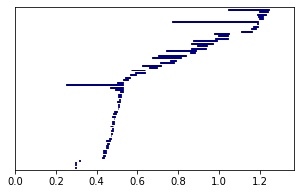

In [34]:
os.makedirs(f"plots/COIL_CYCLES_MIX", exist_ok=True)
X_barcode_1 = exp_ibfm[0]["X_barcode_1"]
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,3))
ibfm.plot_barcode(X_barcode_1, "navy", ax)
plt.savefig(f"plots/COIL_CYCLES_MIX/total_barcode.png")

In [35]:
long_X_bars = ((exp_ibfm[0]["X_barcode_1"][:,1]-exp_ibfm[0]["X_barcode_1"][:,0])>0.15).tolist()
long_X_bars = np.nonzero(long_X_bars)[0].tolist()
print(exp_ibfm[0]["X_barcode_1"][long_X_bars])

[[0.250157 0.530252]
 [0.770786 1.19443 ]
 [1.04309  1.24481 ]]


In [36]:
def plot_cycle_components(repr_cycle, data):
    G = nx.Graph()
    for v in np.unique(repr_cycle):
        G.add_node(v)
    weighted_edges = []
    for edge in np.array(repr_cycle).reshape((-1,2)).tolist():
        weighted_edges.append((edge[0], edge[1], distance.euclidean(data[edge[0]], data[edge[1]])))
    G.add_weighted_edges_from(weighted_edges)
    S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

    figsize=(8*len(S), 8)
    fig, ax = plt.subplots(ncols=len(S), nrows=1, figsize=figsize)
    if len(S)==1:
        ax = [ax]
    for i, sub in enumerate(S):
        pos = nx.spectral_layout(sub)
        nx.draw_networkx(sub, ax=ax[i], pos=pos, width=figsize[0])
        xlim = ax[i].get_xlim()
        ylim = ax[i].get_ylim()
        for node in pos.keys():
            im_array = data[node].reshape((128,128))
            im_frame = Image.fromarray(im_array)
            center = origin=pos[node]
            extent = (center[0]-0.1, center[0]+0.1, center[1]-0.1, center[1]+0.1)
            ax[i].imshow(im_array, cmap="gray", extent=extent, zorder=4)
        
        ax[i].set_ylim(ylim)
        ax[i].set_xlim(xlim)
    # end for 
    return ax


Cycle 34, number of elements: 71
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
Cycle 60, number of elements: 38
[ 73  78  79  80  81  82  89  90  91  92  93  94  95  97  98 119 120 121
 122 123 124 125 132 135 136 137 138 139 140 144 145 146 147 150 170 179
 206 208]
Cycle 65, number of elements: 22
[  6   7   8   9  10  11  12  55  56  57  58  59 158 159 160 161 162 194
 195 196 197 198]


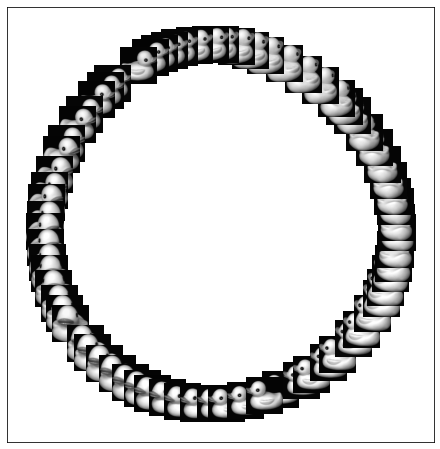

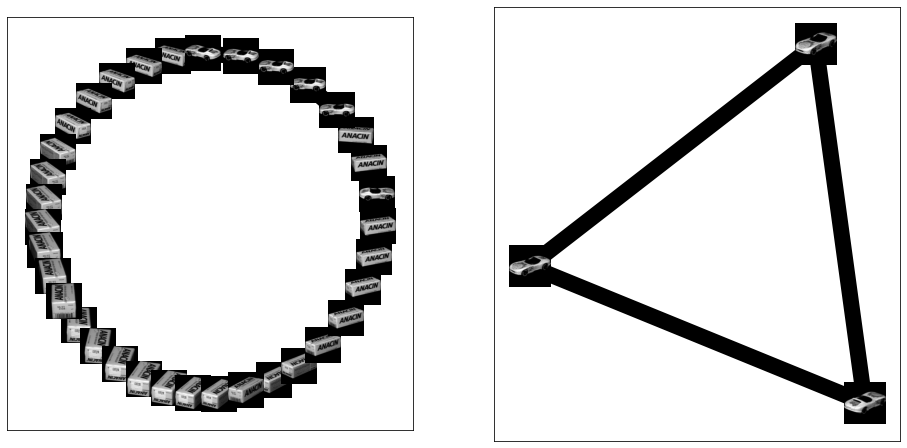

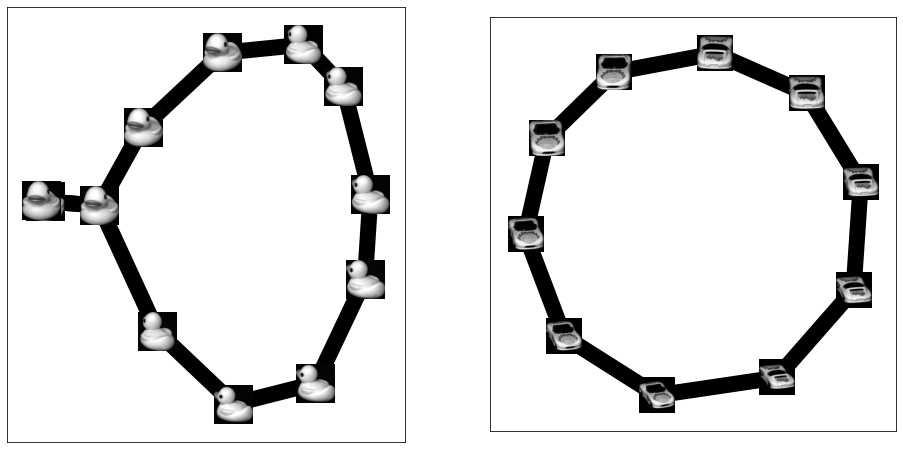

In [37]:
# %%capture
for id, repr_cycle in enumerate(exp_ibfm[0]["X_reps_1"]):
    if id not in long_X_bars:
        continue
    print(f"Cycle {id}, number of elements: {len(np.unique(repr_cycle))}")
    print(np.sort(np.unique(repr_cycle)))
    figsize = (len(repr_cycle), len(repr_cycle))
    figsize = (8,12)
    ax = plot_cycle_components(repr_cycle, data)
    os.makedirs(f"plots/COIL_CYCLES_MIX/codomain", exist_ok=True)
    plt.savefig(f"plots/COIL_CYCLES_MIX/codomain/cycle_rep_codomain_{id}.png")

Get the indices of the intervals which are not in the image of any of the block functions from classes to the total.

In [38]:
indices_image_block_1 = [] 
for ibfm_out in exp_ibfm:
    indices_image_block_1 += np.unique(ibfm_out["block_function_1"]).tolist()

not_indices_block_1 = [i for i in range(exp_ibfm[0]["X_barcode_1"].shape[0]) if i not in indices_image_block_1]

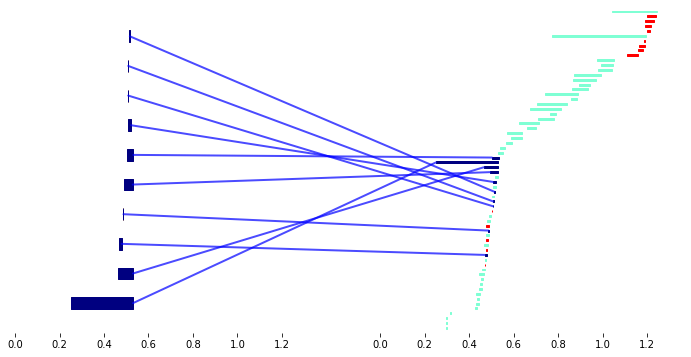

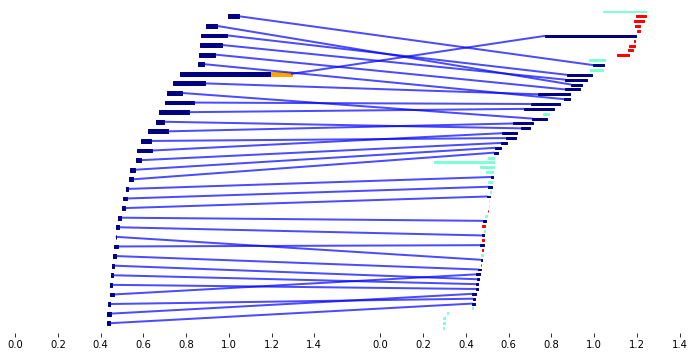

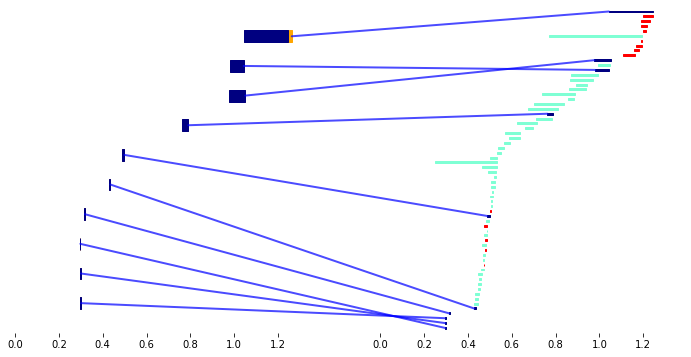

In [39]:
for ibfm_out in exp_ibfm:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    ibfm.plot_matching(ibfm_out, ax, fig, block_function=True, codomain_int=not_indices_block_1)

Now, repeat the same experiment for dimension 0

In [40]:
indices_image_block_0 = [] 
for ibfm_out in exp_ibfm:
    indices_image_block_0 += np.unique(ibfm_out["block_function_0"]).tolist()
not_indices_block_0 = [i for i in range(exp_ibfm[0]["X_barcode_0"].shape[0]) if i not in indices_image_block_0]

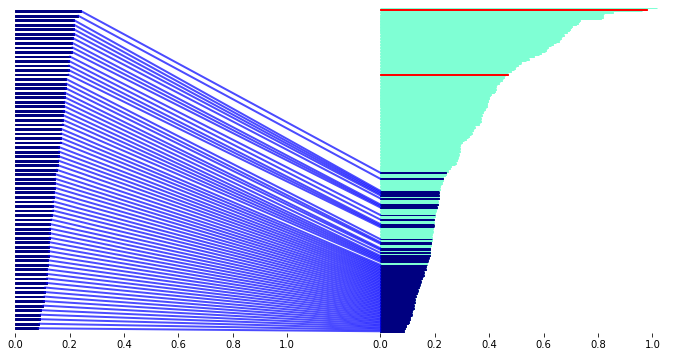

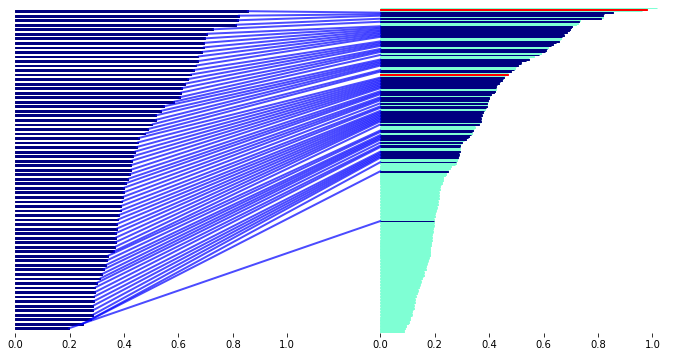

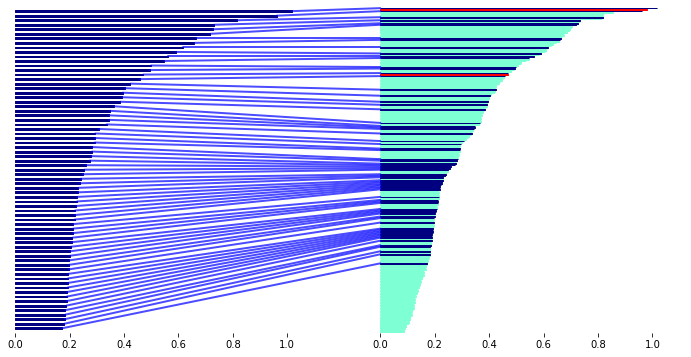

In [41]:
for ibfm_out in exp_ibfm:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    ibfm.plot_matching(ibfm_out, ax, fig, block_function=True, codomain_int=not_indices_block_0, dim=0)

In [42]:
not_indices_block_0

[170, 213]